## Firstly we import the necessary libraries

In [46]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re

## We define a function for removing stop words 

In [47]:


nltk.download("stopwords")
stop = stopwords.words('english')

# standardizing dataset by removing special characters and lowercasing

def standardize(text, remove_digits=True):
    text=re.sub('[^a-zA-Z\d\s]', '',text)
    text = text.lower()

    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aidynamics/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## we define the exploratory data analysis class to perform the following tasks: 
*  Check for missing values
*  Check for imbalanced classes
*  Calculate the length of each example
*  Plot a histogram to visualize the distribution of example lengths
*  Plot a bar plot to visualize the most common words in the dataset
*  Plot bar plots to visualize the most common words in examples belonging to each class
*  Plot a scatterplot to visualize the relationship between two features
*  Plot a pairplot to visualize relationships between multiple features
*  Plot a histogram to visualize the distribution of a numeric feature
*  Plot a density plot to visualize the distribution of a numeric feature
*  Plot a bar plot to visualize the distribution of a categorical feature
*  Plot a box plot to visualize the distribution of a numeric feature

In [48]:

class ExploratoryDataAnalysis:
    def __init__(self, data):
        self.data = data

    def check_missing_values(self):
        """Check for missing values in the dataset"""
        return self.data.isnull().sum()

    def check_imbalanced_classes(self, target_column):
        """Check for imbalanced classes in the dataset"""
        return self.data[target_column].value_counts()



    def example_lengths(self, text_column):
        """Calculate the length of each example and return a list of the lengths"""
        return self.data[text_column].apply(lambda x: len(x.split()))

    def plot_example_lengths(self, text_column):
        """Plot a histogram to visualize the distribution of example lengths"""
        # self.example_lengths(text_column).hist()
        plt.hist(self.example_lengths(text_column).tolist())
        plt.title('Distribution of Example Lengths')
        plt.xlabel('Example Length')
        plt.ylabel('Frequency')
        plt.show()

    def plot_top_words(self, text_column, num_words=20):
        """Plot a bar plot to visualize the most common words in the dataset"""
        all_words = [word for example in self.data[text_column] for word in example.split()]
        word_counts = Counter(all_words)
        top_words = word_counts.most_common(num_words)

        x, y = zip(*top_words)
        plt.bar(x, y)
        plt.xticks(fontsize=14, rotation=90)
        plt.show()

    def plot_top_words_by_class(self, text_column, target_column):
        """Plot bar plots to visualize the most common words in examples belonging to each class"""
        df = pd.DataFrame(self.data)

        pos_df = df[df[target_column] == 1]
        neg_df = df[df[target_column] == 0]

        pos_words = [word for example in pos_df[text_column] for word in example.split()]
        pos_word_counts = Counter(pos_words)
        top_pos_words = pos_word_counts.most_common(20)

        neg_words = [word for example in neg_df[text_column] for word in example.split()]
        neg_word_counts = Counter(neg_words)
        top_neg_words = neg_word_counts.most_common(20)

        plt.figure(figsize=[10, 5])
        plt.subplot(1, 2, 1)
        x, y = zip(*top_pos_words)
        plt.bar(x, y)
        plt.title('Positive Examples')
        plt.ylabel('Frequency')
        plt.xticks(fontsize=14, rotation=90)
        plt.xlabel('Word')

        plt.subplot(1, 2, 2)
        x, y = zip(*top_neg_words)
        plt.bar(x, y)
        plt.title('Negative Examples')
        plt.ylabel('Frequency')
        plt.xticks(fontsize=14, rotation=90)
        plt.xlabel('Word')
        plt.show()

    def plot_scatterplot(self, x, y):
        """Plot a scatterplot to visualize the relationship between two features"""
        sns.scatterplot(x=x, y=y, data=self.data)

    def plot_pairplot(self):
        """Plot a pairplot to visualize relationships between multiple features"""
        sns.pairplot(self.data)

    def plot_histogram(self, feature):
        """Plot a histogram to visualize the distribution of a numeric feature"""
        self.data[feature].hist()
        plt.show()

    def plot_density_plot(self, feature):
        """Plot a density plot to visualize the distribution of a numeric feature"""
        sns.kdeplot(self.data[feature], shade=True)

    def plot_bar_plot(self, feature):
        """Plot a bar plot to visualize the distribution of a categorical feature"""
        sns.countplot(x=feature, data=self.data)

    def plot_box_plot(self, feature):
        """Plot a box plot to visualize the distribution of a numeric feature"""
        sns.boxplot(x=feature, data=self.data)



### We choose to work with rotten_tomatoes_reviews dataset as it is a binary classification problem and we can easily visualize the explaoratory data analysis ###

Found cached dataset rotten_tomatoes (/home/aidynamics/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


  0%|          | 0/3 [00:00<?, ?it/s]

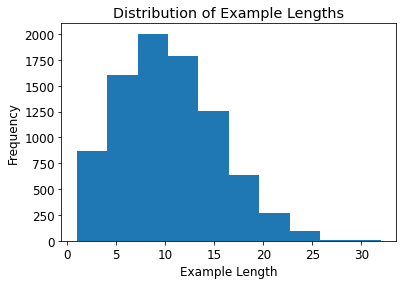

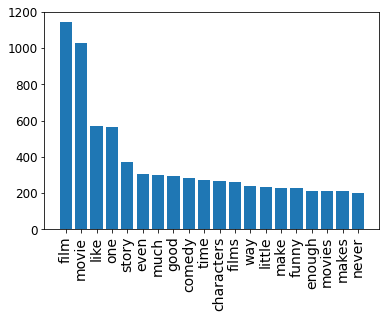

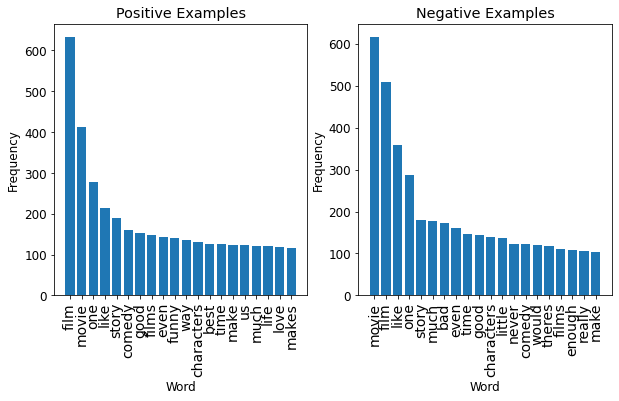

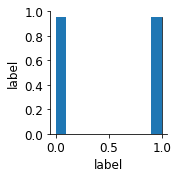

In [44]:

# Load the dataset
data = datasets.load_dataset('rotten_tomatoes')

# Extract the train 
train_data = data['train']


# Create a Pandas dataframe from the train set
train_df = pd.DataFrame(train_data)

# Remove stop words
train_df.text = train_df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_df.text=train_df.text.apply(standardize)



# Create an ExploratoryDataAnalysis object
eda = ExploratoryDataAnalysis(train_df)


# Plot a histogram to visualize the distribution of example lengths

eda.plot_example_lengths('text')

# Plot a bar plot to visualize the most common words in the dataset

eda.plot_top_words('text')

# Plot bar plots to visualize the most common words in examples belonging to each class

eda.plot_top_words_by_class('text', 'label')


# Check for missing values
eda.check_missing_values()

# Check for imbalanced classes
eda.check_imbalanced_classes('label')


# Plot a pairplot to visualize relationships between multiple features
eda.plot_pairplot()

# Plot a histogram to visualize the distribution of a numeric feature
eda.plot_histogram('label')






